# Intermediate Problem Answers

## MyRange and MyLinSpace Problem

### Part 1

In [1]:
struct MyRange
    start
    step
    stop
end

function _MyRange(a::MyRange,i::Int)
    tmp = a.start + a.step*(i-1)
    if tmp > a.stop
        error("Index is out of bounds!")
    else
        return tmp
    end
end

_MyRange (generic function with 1 method)

In [2]:
a = MyRange(1,2,20)
_MyRange(a,5) == (1:2:20)[5]

true

In [3]:
Base.getindex(a::MyRange,i::Int) = _MyRange(a,i)
a[5]

9

### Part 2

In [4]:
struct MyLinSpace
    start
    stop
    n
end

function Base.getindex(a::MyLinSpace,i::Int)
    dx = (a.stop-a.start)/(a.n-1)
    a.start + dx*(i-1)
end

In [5]:
l = MyLinSpace(1,2,50)
l[6]

1.1020408163265305

In [6]:
range(1,stop=2,length=50)[6]

1.1020408163265305

### Part 3

In [7]:
(a::MyRange)(x) = a.start + a.step*(x-1)
a = MyRange(1,2,20)
a(1.1)

1.2000000000000002

### Part 4

In [8]:
using Unitful
a = MyRange(1u"kg",2u"kg",20u"kg")
a[5]

9 kg

## Operator Problem

In [9]:
struct StrangMatrix end
A = StrangMatrix()

using LinearAlgebra
function LinearAlgebra.mul!(C,A::StrangMatrix,B::AbstractVector)
    for i in 2:length(B)-1
        C[i] = B[i-1] - 2B[i] + B[i+1]
    end
    C[1] = -2B[1] + B[2]
    C[end] = B[end-1] - 2B[end]
    C
end

Base.:*(A::StrangMatrix,B::AbstractVector) = (C = similar(B); mul!(C,A,B))

In [10]:
A*ones(10)

10-element Array{Float64,1}:
 -1.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.0

In [11]:
struct SizedStrangMatrix
    size
end

Base.eltype(A::SizedStrangMatrix) = Float64
Base.size(A::SizedStrangMatrix) = A.size
Base.size(A::SizedStrangMatrix,i::Int) = A.size[i]

In [12]:
b = sin.(0:0.1:2π)

63-element Array{Float64,1}:
  0.0
  0.09983341664682815
  0.19866933079506122
  0.2955202066613396
  0.3894183423086505
  0.479425538604203
  0.5646424733950355
  0.6442176872376911
  0.7173560908995228
  0.7833269096274834
  0.8414709848078965
  0.8912073600614354
  0.9320390859672264
  ⋮
 -0.9258146823277321
 -0.8834546557201531
 -0.8322674422239008
 -0.7727644875559871
 -0.7055403255703919
 -0.6312666378723208
 -0.5506855425976376
 -0.4646021794137566
 -0.373876664830236
 -0.27941549819892586
 -0.18216250427209502
 -0.0830894028174964

In [13]:
A = SizedStrangMatrix((length(b),length(b)))

function LinearAlgebra.mul!(C,A::SizedStrangMatrix,B)
    for i in 2:length(B)-1
        C[i] = B[i-1] - 2B[i] + B[i+1]
    end
    C[1] = -2B[1] + B[2]
    C[end] = B[end-1] - 2B[end]
    C
end
Base.:*(A::SizedStrangMatrix,B::AbstractVector) = (C = similar(B); mul!(C,A,B))

In [14]:
using IterativeSolvers
x = gmres(A,b,abstol=1e-14)

63-element Array{Float64,1}:
   -9.755738784527015
  -19.511766690859396
  -29.168509953717464
  -38.62733151652243
  -47.791729399642115
  -56.567920000175796
  -64.86624757503986
  -72.60180867498363
  -79.69549984767629
  -86.0744066415968
  -91.67293002909635
  -96.4331629277098
 -100.30568365156294
    ⋮
   92.73105600644651
   88.63048151986246
   83.64512976504868
   77.82628337498939
   71.23343662444893
   63.93401241944343
   56.001678534095724
   47.51925322977744
   38.57233168626153
   29.251625375895543
   19.65105899819397
    9.867868177542842

In [15]:
A*x - b

63-element Array{Float64,1}:
 -0.00028912180536622145
 -0.0005487731725152822
 -0.0007476307419603812
 -0.0010965269760518925
 -0.0012110597226484
 -0.0015625129345826494
 -0.0018759984747405145
 -0.002347759986583431
 -0.002571712127371506
 -0.0029435032065309175
 -0.0031804959217944795
 -0.0034951853011255807
 -0.0037833560962857726
  ⋮
 -0.0013966167769802196
 -0.0013226125095729957
 -0.0012271930216140037
 -0.001235872925180459
 -0.0010371288946490198
 -0.0016430424698810064
  0.0005941236270565753
  0.0001059402161273093
  9.189798016401296e-5
 -0.00044456913666124365
 -0.0004619386774616929
 -0.0015879540742172321

## Regression Problem

[0.5667940518086091, 0.5721322181327831, 0.7343188884917705, -0.010154105044325621]
[0.5667940518086104, 0.5721322181327854, 0.734318888491772, -0.010154105044327738]


┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


2.023232477679226


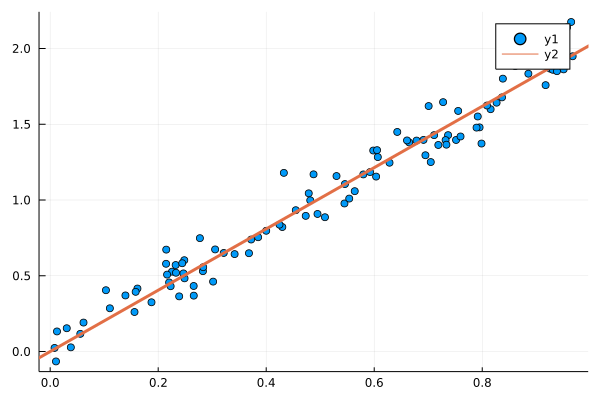

In [16]:
#### Prepare Data

X = rand(1000, 3)               # feature matrix
a0 = rand(3)                    # ground truths
y = X * a0 + 0.1 * randn(1000);  # generate response

X2 = hcat(X,ones(1000))
println(X2\y)

using MultivariateStats
println(llsq(X,y))

using DataFrames, GLM
data = DataFrame(X1=X[:,1], X2=X[:,2], X3=X[:,3],Y=y)
OLS = lm(@formula(Y ~ X1 + X2 + X3), data)


X = rand(100);
y = 2X  + 0.1 * randn(100);

using Plots
b = X\y
println(b)
gr()
scatter(X,y)
Plots.abline!(b[1],0.0, lw=3) # Slope,Intercept

## Type Hierarchy Problem

In [17]:
abstract type AbstractPerson end
abstract type AbstractStudent <: AbstractPerson end

struct Person <: AbstractPerson
    name
end

struct Student <: AbstractStudent
    name
    grade
end

struct GraduateStudent <: AbstractStudent
    name
    grade
end

person_info(p::AbstractPerson) = println(p.name)
person_info(s::AbstractStudent) = (println(s.name); println(s.grade))

person_info (generic function with 2 methods)

In [18]:
person_info(Person("Bob"))

Bob


In [19]:
person_info(Student("Bob",2))

Bob
2


In [20]:
person_info(GraduateStudent("Bob",2))

Bob
2


## Distribution Dispatch Problem

This is from Josh Day's talk: https://www.youtube.com/watch?v=EwcTNzpQ6Sc

Solution is from: https://github.com/joshday/Talks/blob/master/SLG2016_IntroToJulia/Slides.ipynb

In [21]:
using Distributions
function myquantile(d::UnivariateDistribution, q::Number)
    θ = mean(d)
    tol = Inf
    while tol > 1e-5
        θold = θ
        θ = θ - (cdf(d, θ) - q) / pdf(d, θ)
        tol = abs(θold - θ)
    end
    θ
end

for dist in [Gamma(5, 1), Normal(0, 1), Beta(2, 4)]
    @show myquantile(dist, .75)
    @show quantile(dist, .75)
    println()
end

myquantile(dist, 0.75) = 6.274430698436519
quantile(dist, 0.75) = 6.2744306984446885

myquantile(dist, 0.75) = 0.6744897501960708
quantile(dist, 0.75) = 0.6744897501960818

myquantile(dist, 0.75) = 0.45418056477357555
quantile(dist, 0.75) = 0.4541805647736157

